<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/Internship_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [0]:
f = open('news.txt', 'r')


In [0]:
lines = []
for i in f.readlines():
  lines.append(i)

In [37]:
lines

['As many as 67 new cases of coronavirus were confirmed in the national capital today, taking the total number of cases in Delhi to 1,707. The death toll due to coronavirus in Delhi stands at 42. As many as 21,409 people have been tested in Delhi, out of which 16,899 have tested negative, while results of 2,674 are pending.\n',
 '\n',
 'Rajasthan reported 98 new cases of coronavirus on Friday, taking the total number of cases in the state to 1,229, the state health department said. Jodhpur district reported 38 new cases today, with the total number of cases rising to 154 there. The death toll from coronavirus in Rajasthan stands at 17, while 93 people have been discharged.\n',
 '\n',
 'The total number of coronavirus cases in Karnataka reached 359 after 44 new cases were reported, the state government said on Friday. The total number includes 13 deaths and 88 patients who have recovered. Bengaluru Urban district has reported the highest number of cases at 86, while Mysuru has reported 

In [0]:
for i in lines:
  if i == '\n':
    lines.remove(i)

In [39]:
lines

['As many as 67 new cases of coronavirus were confirmed in the national capital today, taking the total number of cases in Delhi to 1,707. The death toll due to coronavirus in Delhi stands at 42. As many as 21,409 people have been tested in Delhi, out of which 16,899 have tested negative, while results of 2,674 are pending.\n',
 'Rajasthan reported 98 new cases of coronavirus on Friday, taking the total number of cases in the state to 1,229, the state health department said. Jodhpur district reported 38 new cases today, with the total number of cases rising to 154 there. The death toll from coronavirus in Rajasthan stands at 17, while 93 people have been discharged.\n',
 'The total number of coronavirus cases in Karnataka reached 359 after 44 new cases were reported, the state government said on Friday. The total number includes 13 deaths and 88 patients who have recovered. Bengaluru Urban district has reported the highest number of cases at 86, while Mysuru has reported 73 cases. The 

In [0]:
news_lines = []
for i in range(len(lines)):
  news_lines.append(lines[i][:-2])

In [41]:
news_lines

['As many as 67 new cases of coronavirus were confirmed in the national capital today, taking the total number of cases in Delhi to 1,707. The death toll due to coronavirus in Delhi stands at 42. As many as 21,409 people have been tested in Delhi, out of which 16,899 have tested negative, while results of 2,674 are pending',
 'Rajasthan reported 98 new cases of coronavirus on Friday, taking the total number of cases in the state to 1,229, the state health department said. Jodhpur district reported 38 new cases today, with the total number of cases rising to 154 there. The death toll from coronavirus in Rajasthan stands at 17, while 93 people have been discharged',
 'The total number of coronavirus cases in Karnataka reached 359 after 44 new cases were reported, the state government said on Friday. The total number includes 13 deaths and 88 patients who have recovered. Bengaluru Urban district has reported the highest number of cases at 86, while Mysuru has reported 73 cases. The state 

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
def nltk_sentiment(news_lines):
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  nltk_sentiment = SentimentIntensityAnalyzer()
  score = nltk_sentiment.polarity_scores(news_lines)
  return score

In [0]:
nltk_results = [nltk_sentiment(row) for row in news_lines]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(news_lines, columns=['News Line'])
nltk_df = text_df.join(results_df)

In [45]:
nltk_df

,News Line,neg,neu,pos,compound
0,As many as 67 new cases of coronavirus were co...,0.117,0.863,0.020,-0.8074
1,Rajasthan reported 98 new cases of coronavirus...,0.063,0.894,0.042,-0.5106
2,The total number of coronavirus cases in Karna...,0.042,0.872,0.086,-0.0772
3,Anushka Sharma shared a video of herself shout...,0.066,0.763,0.171,0.7906
4,As many as 847 more people died of coronavirus...,0.120,0.861,0.020,-0.8166
5,Deaths from the coronavirus pandemic in Italy ...,0.061,0.875,0.064,-0.2023
6,Vice-President M Venkaiah Naidu on Friday said...,0.188,0.711,0.101,-0.7089
7,Odisha government said it will be conducting 5...,0.035,0.908,0.057,0.3400
8,Facebook has announced new 'care' emoji reacti...,0.000,0.867,0.133,0.7717
9,After IPL was suspended indefinitely due to th...,0.151,0.794,0.055,-0.6369


In [0]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS) 

In [0]:
for val in news_lines: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

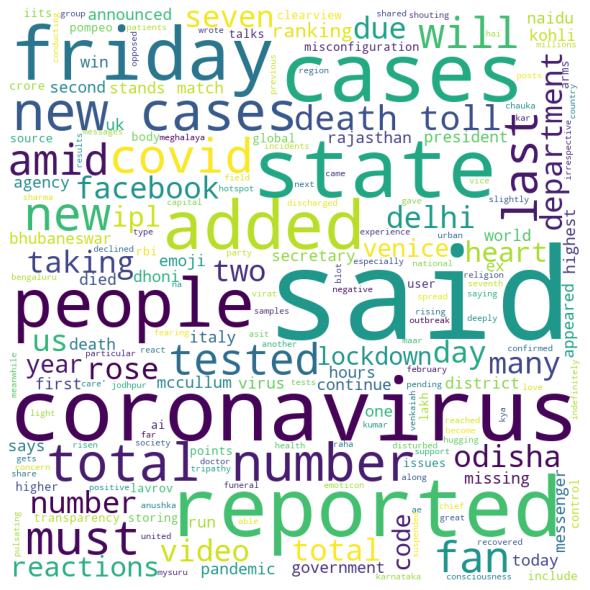

In [54]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 